In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_69091_I')

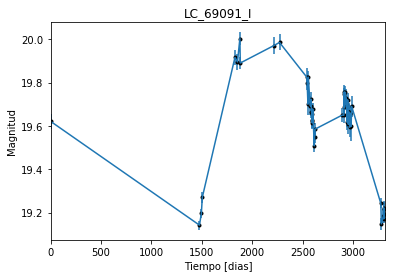

In [3]:
data = np.genfromtxt('LC_69091_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_69091_I')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

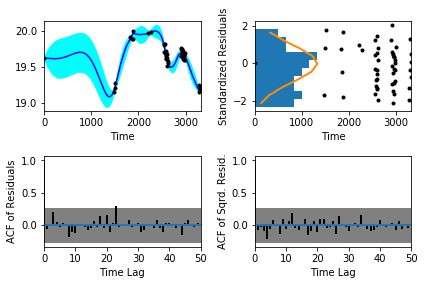

In [6]:
sample.assess_fit()

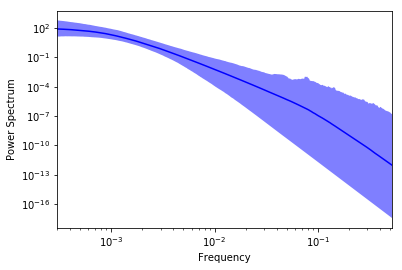

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_69091_I')

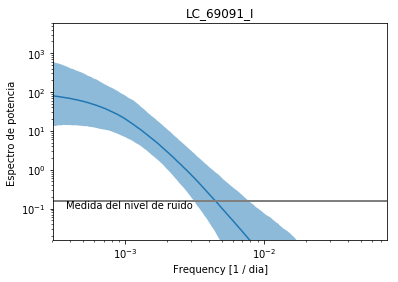

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_69091_I')

Text(0.5,1,'Prediccion , valor esperado LC_69091_I')

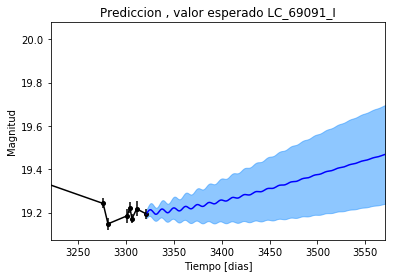

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_69091_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_69091_I')

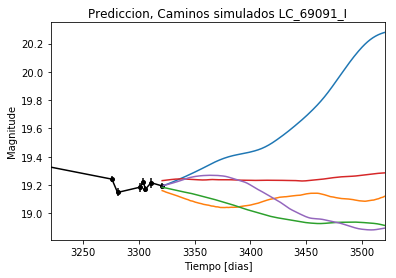

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_69091_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_69091_I')

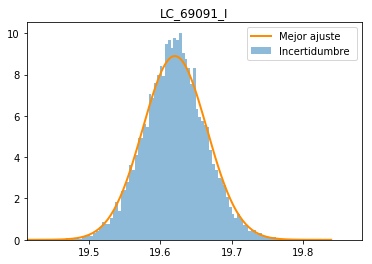

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_69091_I')

Text(0.5,1,'Interpolacion, camino simulado LC_69091_I')

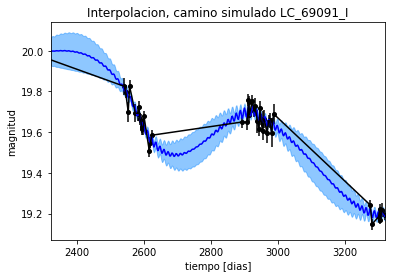

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69091_I')

Text(0.5,1,'Interpolacion, camino simulado LC_69091_I')

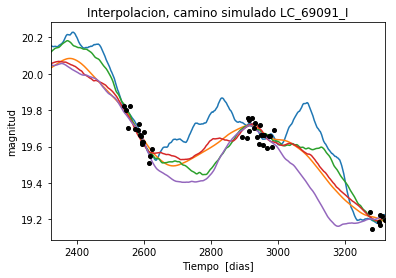

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69091_I')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 459.183089705
Median: 0.00668622898328
Standard deviation: 0.210315790428
68% credibility interval: [ 0.00070401  0.20895399]
95% credibility interval: [  3.47443574e-04   8.51433225e-01]
99% credibility interval: [  3.13971991e-04   1.01606085e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1697.93114523
Median: 0.00109231776835
Standard deviation: 0.0498178285206
68% credibility interval: [ 0.00042183  0.00927737]
95% credibility interval: [ 0.00032097  0.13517221]
99% credibility interval: [  3.06192053e-04   3.63348790e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 356.031515671
Median: 0.00611732591216
Standar

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 667.645736153
Median: 87.024080094
Standard deviation: 1.62974543492
68% credibility interval: [ 85.27405259  88.18010857]
95% credibility interval: [ 82.86811825  89.18750654]
99% credibility interval: [ 80.88249955  91.07142918]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 486.913955555
Median: 0.474925685482
Standard deviation: 2.07767194879
68% credibility interval: [ 0.03479271  3.36899091]
95% credibility interval: [ 0.0127409   7.00199209]
99% credibility interval: [  9.30958942e-03   9.70756054e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 737.588880068
Median: 0.241321301136
Standard deviation: 7.73634167087
68% credibility interval: [ 0.01016687  5.36974864]
95% credibility interval: [  6.9

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2129.22957413
Median: 2.14912447483e-32
Standard deviation: 1.32193040976e+74
68% credibility interval: [  1.32168850e-77   1.28756565e-05]
95% credibility interval: [  4.47872402e-125   5.08149784e+016]
99% credibility interval: [  3.94252271e-134   2.77122046e+049]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2073.06208039
Median: 19.5632920964
Standard deviation: 0.234634428272
68% credibility interval: [ 19.35868379  19.7271004 ]
95% credibility interval: [ 19.02508523  19.97060362]
99% credibility interval: [ 18.69972892  20.2592507 ]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 804.516928808
Median: 0.000846612348404
Standard deviation: 0.225875625456
68% credibility interval: [ 0.          0.24684886]
95% credibility interval: [ 0.          0.87509026]
99% credibility interval: [ 0.          1.00414047]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 804.516928808
Median: 0.000846612348404
Standard deviation: 0.225875625456
68% credibility interval: [ 0.          0.24684886]
95% credibility interval: [ 0.          0.87509026]
99% credibility interval: [ 0.          1.00414047]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 807.803372894
Median: 0.0
Standard deviation: 0.000337291222901
68

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 667.645736153
Median: 87.024080094
Standard deviation: 1.62974543492
68% credibility interval: [ 85.27405259  88.18010857]
95% credibility interval: [ 82.86811825  89.18750654]
99% credibility interval: [ 80.88249955  91.07142918]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1150.95479462
Median: 0.152973910111
Standard deviation: 0.244764171801
68% credibility interval: [ 0.07886321  0.33351682]
95% credibility interval: [ 0.04742157  0.85846351]
99% credibility interval: [ 0.03457219  1.49431157]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1059.06340476
Median: 1.27724103988
Standard deviation: 0.205992636371
68% credibility interval: [ 1.0958352   1.50020958]
95% credibility interval: [ 0.92987727  1.7421769 ]
99% credibility interval: [ 0.81668209  1.8885196 ]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 712.947362277
Median: 7.96543582106e-05
Standard deviation: 0.0408031197735
68% credibility interval: [  1.72873020e-06   2.21058858e-03]
95% credibility interval: [  1.10854670e-17   1.65825093e-02]
99% credibility interval: [  1.67204397e-53   1.83587779e-01]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 459.183089705
Median: (-0.0420108157082-0.228590282024j)
Standard deviation: 1.93918002063
68% credibility interval: [-1.31289665+0.j         -0.00442346-0.00940163j]
95% credibility interval: [ -5.34971273e+00+0.j          -2.18305236e-03-1.49864207j]
99% credibility interval: [ -6.38409858e+00+0.j          -1.97274420e-03-0.50487188j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1697.93114523
Median: (-0.0068632349529+0.0146410544617j)
Standard deviation: 1.45332689662
68% credibility interval: [-0.05829144+0.j         -0.00265043+0.00291812j]
95% credibility interval: [-0.84931202+0.98011907j -0.00201673+0.00439572j]
99% credibility interval: [ -2.28298778e+00+0.00593063j  -1.92386141e-03+0.j        ]
Posterior s